In [25]:
import pandas as pd
import os
import glob2
from rdkit import Chem
from rdkit.Chem import PandasTools, rdinchi

In [26]:
# Defs
def generate_inchi_ID(mol) -> str:
    """
    This function is used to generate a unique id for the route just using the product.
    """
    ID = rdinchi.MolToInchi(mol)
    id = rdinchi.InchiToInchiKey(ID[0])
    return id

In [27]:
files = glob2.glob('/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/syndirella_input/*.csv')
files.pop(-1)
files

['/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/syndirella_input/molecule-set-A71_2A_ryan_merges_24.csv',
 '/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/syndirella_input/A71EV2A_Knitwork_June_42.csv',
 '/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/syndirella_input/molecule-set-A71_EV_2A_exact_hits_3.csv',
 '/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/syndirella_input/molecule-set-aug_2024_x1346_analogues_38.csv',
 '/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/syndirella_input/molecule-set-A71_EV_2A_Ax0926a_manual.csv',
 '/Users/kate_fieseler/PycharmProjects/EV-A71-2A-syndirella-run-2/syndirella_input/molecule-set-A71_EV_2A_covalent_and_noncovalents_16.csv']

,smiles,compound_set,ROMol,inchi
0,NC(=O)C1CCCN(C(=O)c2ccc(Cl)c(C(=O)CN3CCCC3)c2)C1,x0926 merge into p1’,,XFGYJWHIQIBJSY-UHFFFAOYSA-N
1,NC(=O)C1CCCN(C(=O)c2cccc(O)c2C(=O)NC2CC2)C1,x0926 going down p1,,FLMILONKHOWECW-UHFFFAOYSA-N
2,NC(=O)C1CCCN(C(=O)c2cccc(O)c2C(=O)NCc2ccccc2)C1,x0926 going down p1,,IBRVECODLZJKOD-UHFFFAOYSA-N
3,C[n+]1ccc(C(=O)N2CCCC(C(N)=O)C2Cl)[nH]1,X0926 and x1346,,BTEBCTYBHLEZJH-UHFFFAOYSA-O
4,NC(=O)C1CCCN(C(=O)Cc2[nH]ncc2CC(=O)NC2CC2)C1,X0926 and x1346,,OUZJAERXRYTSSC-UHFFFAOYSA-N
...,...,...,...,...
119,CC(=O)Nc1ccc(C=O)cc1,covalent_analogues_aug_2024,,SKLUWKYNZNXSLX-UHFFFAOYSA-N
120,CC(=O)c1ccc2c(c1)CCN2C(C)=O,covalent_analogues_aug_2024,,DDTZNSOMVMYKHA-UHFFFAOYSA-N
121,CC(=O)N1CCc2cc(C=O)ccc21,covalent_analogues_aug_2024,,XFHXIXRTXWMWFG-UHFFFAOYSA-N
122,CC(=O)c1ccc2c(c1)NC(=O)CO2,covalent_analogues_aug_2024,,BKJFWHFUERNXLJ-UHFFFAOYSA-N

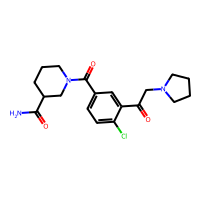
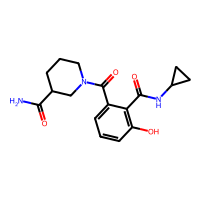
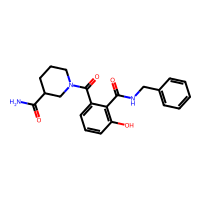
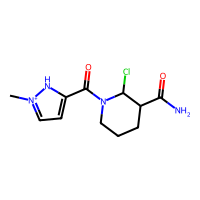
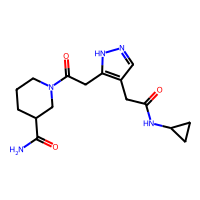
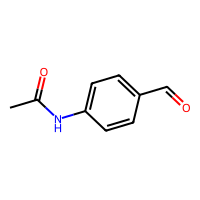
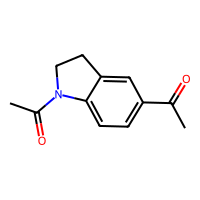
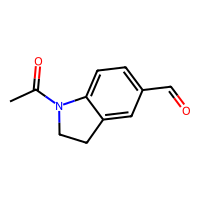
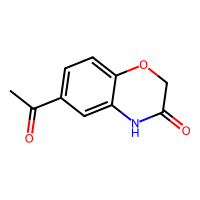
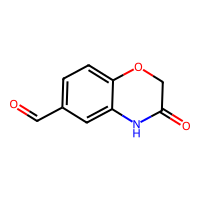

In [29]:
dfs = [pd.read_csv(path, usecols=['smiles','compound_set']) for path in files]
master_df = pd.concat(dfs) # length 133
master_df.reset_index(inplace=True, drop=True)
PandasTools.AddMoleculeColumnToFrame(master_df, smilesCol='smiles')
master_df['inchi'] = master_df['ROMol'].apply(lambda x: generate_inchi_ID(x))
master_df

In [32]:
master_df.to_csv('../designs/all_scaffolds_w_inchi.csv')

In [33]:
dfs_lens = [len(df) for df in dfs]
dfs_lens

[24, 42, 3, 38, 1, 16]

In [ ]:
# need to make a script that will search through dirs to find directories with inchi-base-check. 

